# DATA SCIENCE FIELD SALARY CATEGORIZATION



# KEHINDE CHRISTOPHER AFOLABI

## OBJECTIVE
Being contacted by an entrepreneur who is interested in establishing an Ed_tech company that trains data professionals on a train-now-pay-later scheme, my objective is to carry out a descriptive analysis on a data set of over 600 data professionals across different designation, experience, country, company size and work model to the end that we can give a logical conclusion on what factors if combined will give more profit to the company. In my recommendation, I will advise the new company on what to focus on and what should be their target in order to ensure they are training data professionals who are in demand and who will be well paid such that they will be able to pay back their training fee as fast as possible.


## RESEARCH QUESTIONS
* 1.	Which Designation earns the most salary

* 2.	Identify the highest employing country, 

* 3.    Identify the highest employed designation 

* 4.    Identify the most involved countries

* 5.	What is the effect of work model on pay

* 6.	Does the size of company affect the pay? If yes, what company size pays the most


## Importing useful libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('Data_Science_Fields_Salary_Categorization.csv')
df1.head(10)

,Unnamed: 0,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,1,2020,Data Scientist,MI,FT,"6,352,272.00",DE,DE,L,0
1,2,2020,Machine Learning Scientist,SE,FT,"20,688,070.00",JP,JP,S,0
2,3,2020,Big Data Engineer,SE,FT,"8,674,985.00",GB,GB,M,50
3,4,2020,Product Data Analyst,MI,FT,"1,591,390.00",HN,HN,S,0
4,5,2020,Machine Learning Engineer,SE,FT,"11,935,425.00",US,US,L,50
5,6,2020,Data Analyst,EN,FT,"5,729,004.00",US,US,L,100
6,7,2020,Lead Data Scientist,SE,FT,"15,118,205.00",US,US,S,100
7,8,2020,Data Scientist,MI,FT,"2,843,416.00",HU,HU,L,50
8,9,2020,Business Data Analyst,MI,FT,"10,741,883.00",US,US,L,100
9,10,2020,Lead Data Engineer,SE,FT,"9,946,188.00",NZ,NZ,S,50


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            607 non-null    int64 
 1   Working_Year          607 non-null    int64 
 2   Designation           607 non-null    object
 3   Experience            607 non-null    object
 4   Employment_Status     607 non-null    object
 5   Salary_In_Rupees      607 non-null    object
 6   Employee_Location     607 non-null    object
 7   Company_Location      607 non-null    object
 8   Company_Size          607 non-null    object
 9   Remote_Working_Ratio  607 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 47.5+ KB


## Data Cleaning

* check duplicates and drop
* Salary_In_Rupees dytpe is an object, hence it needs to be changed to float so we can calculate  with it
* Drop the 'unnamed: 0' column because it is not useful for this analysis
* change abbreviations to fullname for easy comprehension (experience,employment_ status,company_size & remote_working_ratio

### 1. Check duplicates and drop

In [4]:
df1.duplicated().value_counts()

False    607
dtype: int64

#### No duplicates found in the data

### 2.Salary_In_Rupees dytpe is an object, hence it needs to be changed to float so we can calculate with it

In [5]:
df1['Salary_In_Rupees']= df1.Salary_In_Rupees.replace(',','', regex= True).astype(float)

In [6]:
df1.dtypes

Unnamed: 0                int64
Working_Year              int64
Designation              object
Experience               object
Employment_Status        object
Salary_In_Rupees        float64
Employee_Location        object
Company_Location         object
Company_Size             object
Remote_Working_Ratio      int64
dtype: object

### 3. Drop the 'unnamed: 0' column because it is not useful for this analysis

In [7]:
df1.drop(columns=['Unnamed: 0'],inplace=True)

In [8]:
df1.head(10)

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,2020,Data Scientist,MI,FT,6352272.0,DE,DE,L,0
1,2020,Machine Learning Scientist,SE,FT,20688070.0,JP,JP,S,0
2,2020,Big Data Engineer,SE,FT,8674985.0,GB,GB,M,50
3,2020,Product Data Analyst,MI,FT,1591390.0,HN,HN,S,0
4,2020,Machine Learning Engineer,SE,FT,11935425.0,US,US,L,50
5,2020,Data Analyst,EN,FT,5729004.0,US,US,L,100
6,2020,Lead Data Scientist,SE,FT,15118205.0,US,US,S,100
7,2020,Data Scientist,MI,FT,2843416.0,HU,HU,L,50
8,2020,Business Data Analyst,MI,FT,10741883.0,US,US,L,100
9,2020,Lead Data Engineer,SE,FT,9946188.0,NZ,NZ,S,50


### 4.Change Abbreviations; 'Employment_Status'

In [9]:
df1['Employment_Status'].value_counts()

FT    588
PT     10
CT      5
FL      4
Name: Employment_Status, dtype: int64

In [10]:
df1['Employment_Status']= df1.Employment_Status.replace('FT','Full_Time',regex=True).astype(str)
df1['Employment_Status']= df1.Employment_Status.replace('PT','Part_Time',regex=True).astype(str)
df1['Employment_Status']= df1.Employment_Status.replace('CT','Contract',regex=True).astype(str)

In [11]:
df1['Employment_Status'].value_counts()

Full_Time    588
Part_Time     10
Contract       5
FL             4
Name: Employment_Status, dtype: int64

### 5..Change Abbreviations; 'Experience'

In [12]:
df1['Experience'].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: Experience, dtype: int64

In [13]:
df1['Experience']= df1.Experience.replace('MI','Mid-Level',regex=True).astype(str)
df1['Experience']= df1.Experience.replace('SE','Senior-Level',regex=True).astype(str)
df1['Experience']= df1.Experience.replace('EN','Entry-Level',regex=True).astype(str)

In [14]:
df1['Experience'].value_counts()

Senior-Level    280
Mid-Level       213
Entry-Level      88
EX               26
Name: Experience, dtype: int64

### 6.Change Abbreviations; 'Company_Size'

In [15]:
df1['Company_Size'].value_counts()

M    326
L    198
S     83
Name: Company_Size, dtype: int64

In [16]:
df1['Company_Size']= df1.Company_Size.replace('L','Large',regex=True).astype(str)
df1['Company_Size']= df1.Company_Size.replace('S','Small',regex=True).astype(str)
df1['Company_Size']= df1.Company_Size.replace('M','Medium',regex=True).astype(str)

### 7.Change Abbreviations; 'Remote_Working_Ratio'

In [17]:
df1['Remote_Working_Ratio'].value_counts()

100    381
0      127
50      99
Name: Remote_Working_Ratio, dtype: int64

In [18]:
df1['Remote_Working_Ratio']= df1.Remote_Working_Ratio.replace(100,'Remote',regex=True).astype(str)
df1['Remote_Working_Ratio']= df1.Remote_Working_Ratio.replace('50','Hybrid',regex=True).astype(str)
df1['Remote_Working_Ratio']= df1.Remote_Working_Ratio.replace('0','On-site',regex=True).astype(str)

In [19]:
df1

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,2020,Data Scientist,Mid-Level,Full_Time,6352272.0,DE,DE,Large,On-site
1,2020,Machine Learning Scientist,Senior-Level,Full_Time,20688070.0,JP,JP,Small,On-site
2,2020,Big Data Engineer,Senior-Level,Full_Time,8674985.0,GB,GB,Medium,Hybrid
3,2020,Product Data Analyst,Mid-Level,Full_Time,1591390.0,HN,HN,Small,On-site
4,2020,Machine Learning Engineer,Senior-Level,Full_Time,11935425.0,US,US,Large,Hybrid
...,...,...,...,...,...,...,...,...,...
602,2022,Data Engineer,Senior-Level,Full_Time,12253703.0,US,US,Medium,Remote
603,2022,Data Engineer,Senior-Level,Full_Time,10025757.0,US,US,Medium,Remote
604,2022,Data Analyst,Senior-Level,Full_Time,10264466.0,US,US,Medium,On-site
605,2022,Data Analyst,Senior-Level,Full_Time,11935425.0,US,US,Medium,Remote


In [20]:
df1['Designation'].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Machine Learning Scientist                    8
Big Data Engineer                             8
Director of Data Science                      7
AI Scientist                                  7
Principal Data Scientist                      7
Data Analytics Manager                        7
Data Science Consultant                       7
Computer Vision Engineer                      6
Lead Data Engineer                            6
ML Engineer                                   6
BI Data Analyst                               6
Data Engineering Manager                      5
Head of Data                                  5
Applied Data Scientist                  

## There is tidiness issue here,there is need to merge some designations together

# Designations that stands out

* Data analyst ,'Data Analyst','Data Analytics Manager ','BI Data Analyst ','Business Data Analyst','Principal Data Analyst','Financial Data Analyst','Product Data Analyst'

* 'Marketing Data Analyst','Finance Data Analyst','Data Analytics Lead'

* Data engineer,'Data Engineer','Big Data Engineer','Lead Data Engineer','Data Engineering Manager','Data Analytics 

* Engineer','Analytics Engineer','Principal Data Engineer','Data Science Engineer','Director of Data Engineering','Cloud Data Engineer '

* machine learning engineer,'Machine Learning Engineer','Machine Learning Scientist','ML Engineer','Applied Machine Learning Scientist','Machine Learning Developer','Machine Learning Infrastructure Engineer','Machine Learning Manager','Lead Machine Learning Engineer','Head of Machine Learning'

* Data scientist,'Data Scientist','Research Scientist','Data Science Manager','Principal Data Scientist','Data Science Consultant','Director of Data Science','Applied Data Scientist','Head of Data Science','Lead Data Scientist','Staff Data Scientist','Research Scientist'

* Computer Vision Engineer,'3D Computer Vision Researcher','Computer Vision Software Engineer','Computer Vision Engineer'

* NLP Engineer

* ETL Developer

* Data Architect,'Big Data Architect','Data Architect',

* AI Scientist

In [21]:
df1['Designation']= df1.Designation.replace(['Data Analyst','Data Analytics Manager','BI Data Analyst','Business Data Analyst','Principal Data Analyst','Financial Data Analyst','Product Data Analyst'
'Marketing Data Analyst','Finance Data Analyst','Data Analytics Lead','Lead Data Analyst','Product Data Analyst'],'Data Analyst',regex=True).astype(str)

df1['Designation']= df1.Designation.replace(['Data Engineer','Big Data Engineer','Lead Data Engineer','Data Engineering Manager','Data Analytics Engineer','Analytics Engineer','Principal Data Engineer',
'Data Science Engineer','Director of Data Engineering','Cloud Data Engineer'],'Data Engineer',regex=True).astype(str)

df1['Designation']= df1.Designation.replace(['Machine Learning Engineer','Machine Learning Scientist','ML Engineer','Applied Machine Learning Scientist','Machine Learning Developer','Machine Learning Infrastructure Engineer',#
'Machine Learning Manager','Lead Machine Learning Engineer','Head of Machine Learning','Applied Machine Learning Engineer'],'Machine Learning Engineer',regex=True).astype(str)

df1['Designation']= df1.Designation.replace(['Data Scientist','Research Scientist','Data Science Manager','Principal Data Scientist','Data Science Consultant','Director of Data Science','Applied Data Scientist',
'Head of Data Science','Head of Data','Lead Data Scientist','Staff Data Scientist','Research Scientist'],'Data Scientist',regex=True).astype(str)

df1['Designation']= df1.Designation.replace(['3D Computer Vision Researcher','Computer Vision Software Engineer','Computer Vision Engineer'],'Computer Vision Engineer',regex=True).astype(str)

df1['Designation']= df1.Designation.replace(['Big Data Architect','Data Architect'],'Data Architect',regex=True).astype(str)

In [22]:
df1['Designation'].value_counts()

Data Scientist               210
Data Engineer                169
Data Analyst                 126
Machine Learning Engineer     68
Data Architect                12
Computer Vision Engineer      10
AI Scientist                   7
ETL Developer                  2
NLP Engineer                   1
Data Specialist                1
Marketing Data Analyst         1
Name: Designation, dtype: int64

## There is need to drop some designations because they have less than =<2 entries,hence we can't make a proper conclusion on using  them

In [23]:
d=df1[df1['Designation']=='Data Specialist']
d


,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
165,2021,Data Specialist,Senior-Level,Full_Time,13128968.0,US,US,Large,Remote


In [24]:
a=df1[df1['Designation']=='ETL Developer']
a

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
373,2022,ETL Developer,Mid-Level,Full_Time,4372901.0,GR,GR,Medium,On-site
374,2022,ETL Developer,Mid-Level,Full_Time,4372901.0,GR,GR,Medium,On-site


In [25]:
s=df1[df1['Designation']=='NLP Engineer']
s

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
455,2022,NLP Engineer,Mid-Level,Full_Time,2962850.0,US,US,Large,Hybrid


In [26]:
q=df1[df1['Designation']=='Marketing Data Analyst']
q

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
90,2021,Marketing Data Analyst,Senior-Level,Full_Time,7054154.0,GR,DK,Large,Remote


In [27]:
df1.drop([165,373,374,455,90],inplace=True)
df1

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,2020,Data Scientist,Mid-Level,Full_Time,6352272.0,DE,DE,Large,On-site
1,2020,Machine Learning Engineer,Senior-Level,Full_Time,20688070.0,JP,JP,Small,On-site
2,2020,Data Engineer,Senior-Level,Full_Time,8674985.0,GB,GB,Medium,Hybrid
3,2020,Data Analyst,Mid-Level,Full_Time,1591390.0,HN,HN,Small,On-site
4,2020,Machine Learning Engineer,Senior-Level,Full_Time,11935425.0,US,US,Large,Hybrid
...,...,...,...,...,...,...,...,...,...
602,2022,Data Engineer,Senior-Level,Full_Time,12253703.0,US,US,Medium,Remote
603,2022,Data Engineer,Senior-Level,Full_Time,10025757.0,US,US,Medium,Remote
604,2022,Data Analyst,Senior-Level,Full_Time,10264466.0,US,US,Medium,On-site
605,2022,Data Analyst,Senior-Level,Full_Time,11935425.0,US,US,Medium,Remote


$$
 SEPERATION ACCORDING  TO  EXPERIENCE
$$

# ENTRY LEVEL

In [35]:
df1_e=df1.where(df1['Experience']=='Entry-Level')
df1_e.dropna(inplace=True)
df1_e

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
5,2020.0,Data Analyst,Entry-Level,Full_Time,5729004.0,US,US,Large,Remote
10,2020.0,Data Scientist,Entry-Level,Full_Time,4083586.0,FR,FR,Small,On-site
12,2020.0,Data Scientist,Entry-Level,Full_Time,3176096.0,FR,FR,Medium,On-site
16,2020.0,Data Engineer,Entry-Level,Full_Time,3317173.0,JP,JP,Small,Remote
18,2020.0,Data Scientist,Entry-Level,Full_Time,454103.0,IN,IN,Medium,Hybrid
...,...,...,...,...,...,...,...,...,...
512,2022.0,Data Engineer,Entry-Level,Full_Time,5172018.0,US,US,Small,Remote
514,2022.0,Data Engineer,Entry-Level,Full_Time,1591390.0,PK,PK,Medium,On-site
521,2022.0,Computer Vision Engineer,Entry-Level,Full_Time,795695.0,PT,LU,Medium,Remote
600,2022.0,Data Analyst,Entry-Level,Full_Time,5331157.0,CA,CA,Medium,On-site


In [36]:
df1_e.info()
df1_e['Designation'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 5 to 601
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          88 non-null     float64
 1   Designation           88 non-null     object 
 2   Experience            88 non-null     object 
 3   Employment_Status     88 non-null     object 
 4   Salary_In_Rupees      88 non-null     float64
 5   Employee_Location     88 non-null     object 
 6   Company_Location      88 non-null     object 
 7   Company_Size          88 non-null     object 
 8   Remote_Working_Ratio  88 non-null     object 
dtypes: float64(2), object(7)
memory usage: 6.9+ KB


Data Scientist               32
Data Analyst                 17
Data Engineer                16
Machine Learning Engineer    14
Computer Vision Engineer      5
AI Scientist                  4
Name: Designation, dtype: int64

## Q1: Which Designation earns the most salary

In [37]:
# Q1
f =  df1_e.groupby('Designation' ,as_index= False).Salary_In_Rupees.mean()
f1=f.sort_values('Salary_In_Rupees',ascending= False).head(5)
f1

,Designation,Salary_In_Rupees
5,Machine Learning Engineer,6.694017e+06
1,Computer Vision Engineer,6.104715e+06
4,Data Scientist,4.935917e+06
2,Data Analyst,4.544364e+06
3,Data Engineer,4.074516e+06


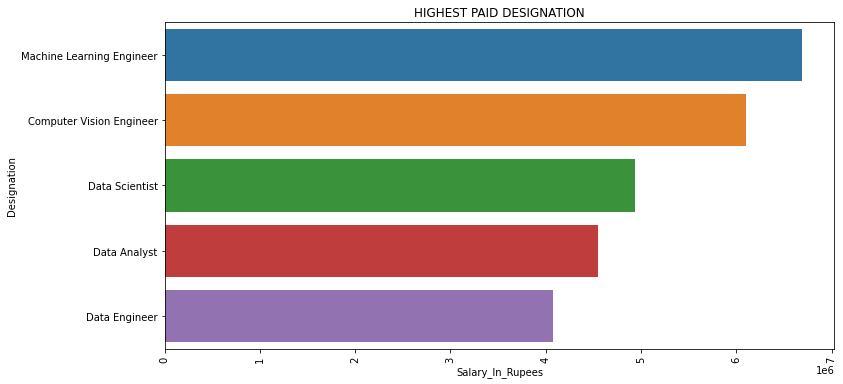

In [38]:
plt.figure(figsize=(12,6))
sns.barplot(x='Salary_In_Rupees',y='Designation',data=f1)
plt.xticks(rotation=90)
plt.title('HIGHEST PAID DESIGNATION')
plt.show()

## Q2: Highest employing country, designation and employee location

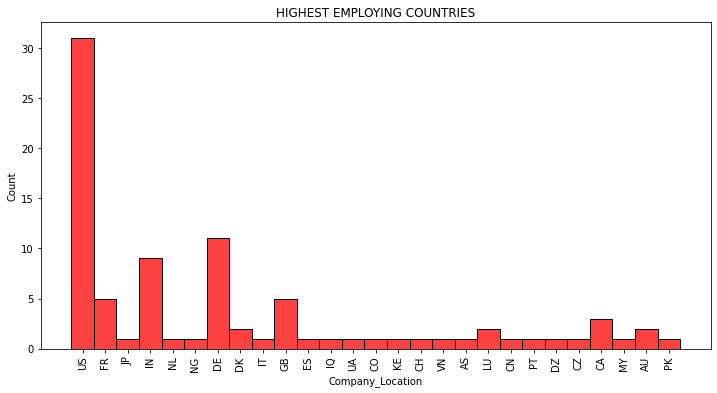

In [39]:
c=df1_e['Company_Location']
plt.figure(figsize=(12,6))
sns.histplot(data=c,color='red')
plt.xticks(rotation=90)
plt.title('HIGHEST EMPLOYING COUNTRIES')
plt.show()

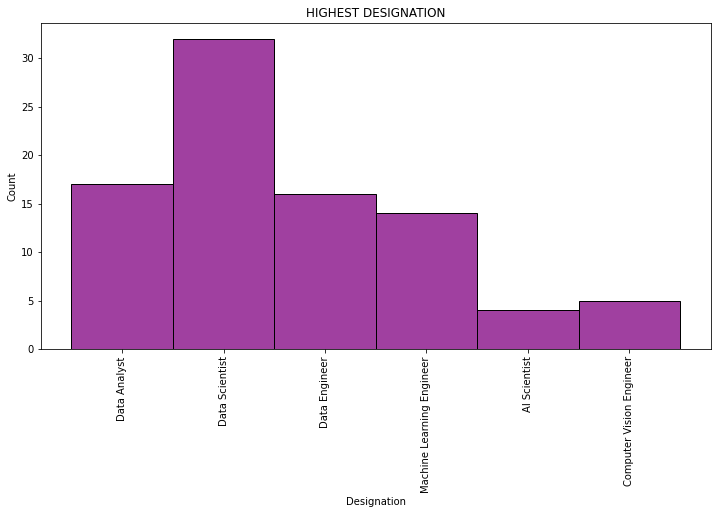

In [40]:
d=df1_e['Designation']
plt.figure(figsize=(12,6))
sns.histplot(data=d,color='purple')
plt.xticks(rotation=90)
plt.title('HIGHEST DESIGNATION')
plt.show()

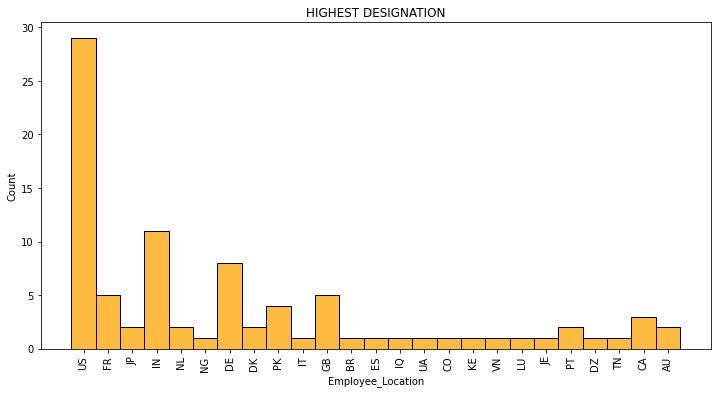

In [41]:
e=df1_e['Employee_Location']
plt.figure(figsize=(12,6))
sns.histplot(data=e,color='orange')
plt.xticks(rotation=90)
plt.title('HIGHEST DESIGNATION')
plt.show()

## Q3: What is the effect of remote work ratio on pay

In [42]:
f9=df1_e[['Remote_Working_Ratio','Salary_In_Rupees']].groupby(['Remote_Working_Ratio'],as_index= False).Salary_In_Rupees.mean()
f3_9_p=f9.sort_values('Salary_In_Rupees',ascending= False)
f3_9_p

,Remote_Working_Ratio,Salary_In_Rupees
2,Remote,5.058024e+06
0,Hybrid,4.782070e+06
1,On-site,4.588483e+06


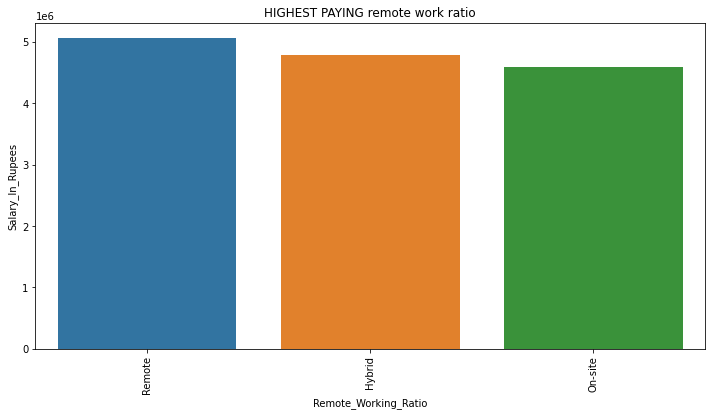

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(y='Salary_In_Rupees',x='Remote_Working_Ratio', data=f3_9_p)
plt.xticks(rotation=90)
plt.title('HIGHEST PAYING remote work ratio')
plt.show()

## Q4: What company size pays the most

In [44]:
f4_1=df1_e[['Company_Size','Salary_In_Rupees']].groupby(['Company_Size'],as_index= False).Salary_In_Rupees.mean()
f4_1_p=f4_1.sort_values('Salary_In_Rupees',ascending= False).head(10)
f4_1_p

,Company_Size,Salary_In_Rupees
0,Large,5.793713e+06
2,Small,4.948054e+06
1,Medium,4.004080e+06


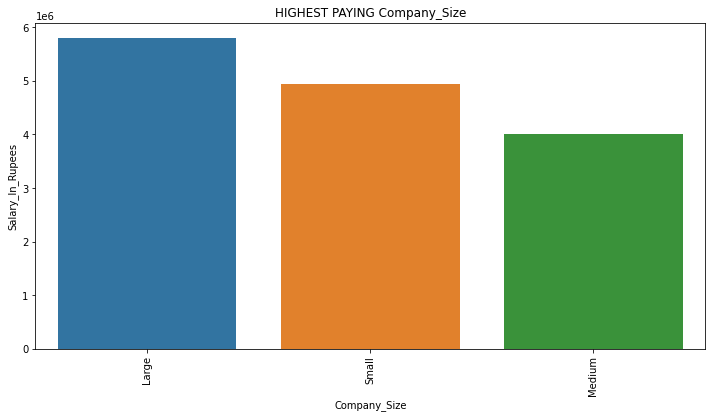

In [45]:
plt.figure(figsize=(12,6))
sns.barplot(y='Salary_In_Rupees',x='Company_Size', data=f4_1_p)
plt.xticks(rotation=90)
plt.title('HIGHEST PAYING Company_Size')
plt.show()

## MID-LEVEL

In [46]:
df1_m=df1.where(df1['Experience']=='Mid-Level')
df1_m.dropna(inplace=True)
df1_m

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,2020.0,Data Scientist,Mid-Level,Full_Time,6352272.0,DE,DE,Large,On-site
3,2020.0,Data Analyst,Mid-Level,Full_Time,1591390.0,HN,HN,Small,On-site
7,2020.0,Data Scientist,Mid-Level,Full_Time,2843416.0,HU,HU,Large,Hybrid
8,2020.0,Data Analyst,Mid-Level,Full_Time,10741883.0,US,US,Large,Remote
11,2020.0,Data Scientist,Mid-Level,Full_Time,3221053.0,IN,IN,Large,On-site
...,...,...,...,...,...,...,...,...,...
567,2022.0,Data Analyst,Mid-Level,Full_Time,5206869.0,GB,GB,Medium,On-site
586,2022.0,Data Analyst,Mid-Level,Full_Time,3644840.0,GB,GB,Medium,On-site
598,2022.0,Data Scientist,Mid-Level,Full_Time,12731120.0,US,US,Medium,Remote
599,2022.0,Data Scientist,Mid-Level,Full_Time,10344035.0,US,US,Medium,Remote


In [47]:
df1_m.info()
df1_m['Designation'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 606
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          210 non-null    float64
 1   Designation           210 non-null    object 
 2   Experience            210 non-null    object 
 3   Employment_Status     210 non-null    object 
 4   Salary_In_Rupees      210 non-null    float64
 5   Employee_Location     210 non-null    object 
 6   Company_Location      210 non-null    object 
 7   Company_Size          210 non-null    object 
 8   Remote_Working_Ratio  210 non-null    object 
dtypes: float64(2), object(7)
memory usage: 16.4+ KB


Data Scientist               76
Data Engineer                61
Data Analyst                 41
Machine Learning Engineer    25
Data Architect                3
Computer Vision Engineer      2
AI Scientist                  2
Name: Designation, dtype: int64

## Q1: Which Designation earns the most salary

In [48]:
# Q1
f =  df1_m.groupby('Designation' ,as_index= False).Salary_In_Rupees.mean()
f1=f.sort_values('Salary_In_Rupees',ascending= False).head(5)
f1

,Designation,Salary_In_Rupees
3,Data Architect,1.326158e+07
0,AI Scientist,1.273112e+07
6,Machine Learning Engineer,7.847462e+06
5,Data Scientist,7.329866e+06
4,Data Engineer,6.538574e+06


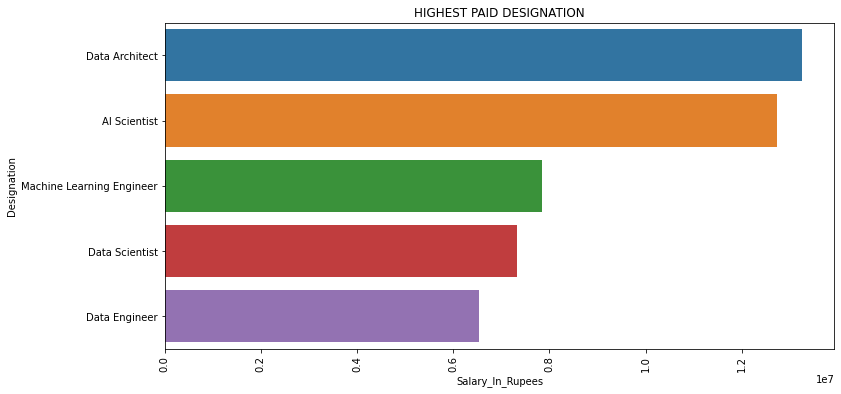

In [49]:
plt.figure(figsize=(12,6))
sns.barplot(x='Salary_In_Rupees',y='Designation',data=f1)
plt.xticks(rotation=90)
plt.title('HIGHEST PAID DESIGNATION')
plt.show()

## Q2: Highest employing country, designation and employee location


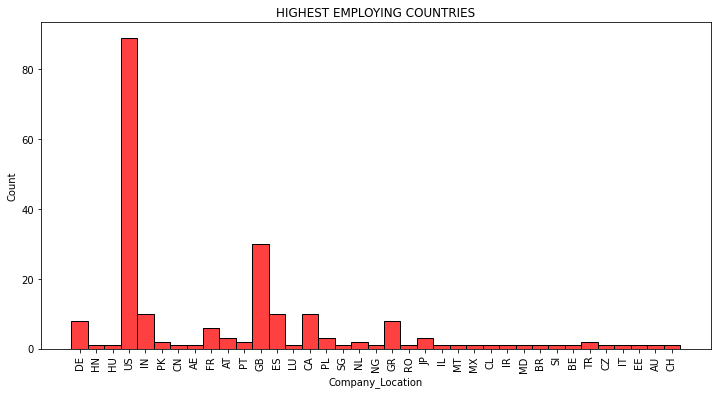

In [50]:
c=df1_m['Company_Location']
plt.figure(figsize=(12,6))
sns.histplot(data=c,color='red')
plt.xticks(rotation=90)
plt.title('HIGHEST EMPLOYING COUNTRIES')
plt.show()

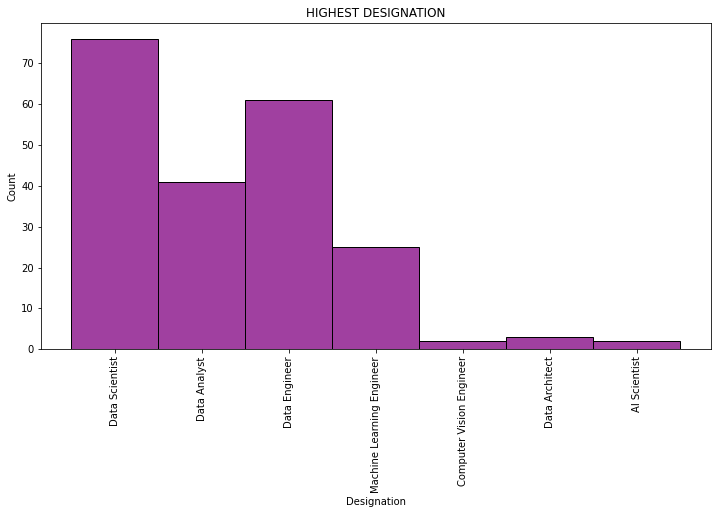

In [51]:

d=df1_m['Designation']
plt.figure(figsize=(12,6))
sns.histplot(data=d,color='purple')
plt.xticks(rotation=90)
plt.title('HIGHEST DESIGNATION')
plt.show()

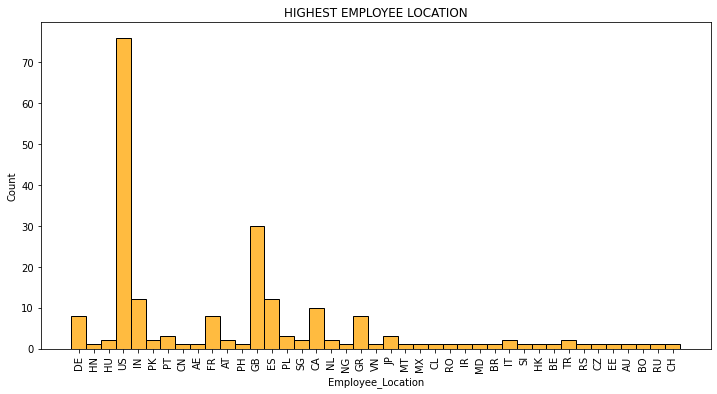

In [52]:

e=df1_m['Employee_Location']
plt.figure(figsize=(12,6))
sns.histplot(data=e,color='orange')
plt.xticks(rotation=90)
plt.title('HIGHEST EMPLOYEE LOCATION')
plt.show()

## Q3: What is the effect of remote work ratio on pay



In [53]:
f9=df1_m[['Remote_Working_Ratio','Salary_In_Rupees']].groupby(['Remote_Working_Ratio'],as_index= False).Salary_In_Rupees.mean()
f3_9_p=f9.sort_values('Salary_In_Rupees',ascending= False)
f3_9_p

,Remote_Working_Ratio,Salary_In_Rupees
2,Remote,7.564326e+06
1,On-site,6.615097e+06
0,Hybrid,6.160059e+06


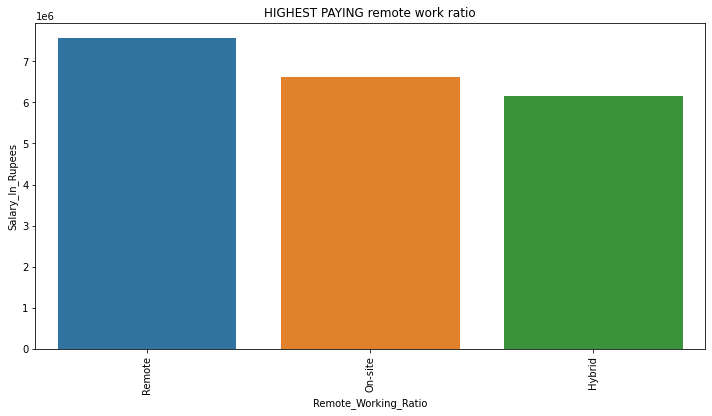

In [54]:
plt.figure(figsize=(12,6))
sns.barplot(y='Salary_In_Rupees',x='Remote_Working_Ratio', data=f3_9_p)
plt.xticks(rotation=90)
plt.title('HIGHEST PAYING remote work ratio')
plt.show()

## Q4: What company size pays the most


In [55]:
f4_1=df1_m[['Company_Size','Salary_In_Rupees']].groupby(['Company_Size'],as_index= False).Salary_In_Rupees.mean()
f4_1_p=f4_1.sort_values('Salary_In_Rupees',ascending= False).head(10)
f4_1_p

,Company_Size,Salary_In_Rupees
0,Large,7.857138e+06
1,Medium,7.226744e+06
2,Small,4.070726e+06


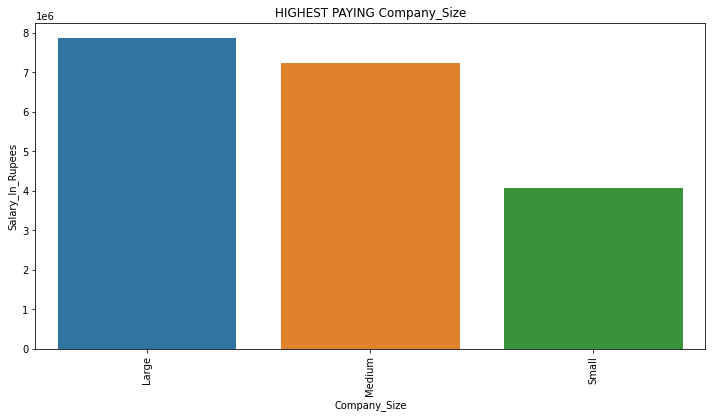

In [56]:
plt.figure(figsize=(12,6))
sns.barplot(y='Salary_In_Rupees',x='Company_Size', data=f4_1_p)
plt.xticks(rotation=90)
plt.title('HIGHEST PAYING Company_Size')
plt.show()

## SENIOR LEVEL

In [57]:
df1_s=df1.where(df1['Experience']=='Senior-Level')
df1_s.dropna(inplace=True)
df1_s

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
1,2020.0,Machine Learning Engineer,Senior-Level,Full_Time,20688070.0,JP,JP,Small,On-site
2,2020.0,Data Engineer,Senior-Level,Full_Time,8674985.0,GB,GB,Medium,Hybrid
4,2020.0,Machine Learning Engineer,Senior-Level,Full_Time,11935425.0,US,US,Large,Hybrid
6,2020.0,Data Scientist,Senior-Level,Full_Time,15118205.0,US,US,Small,Remote
9,2020.0,Data Engineer,Senior-Level,Full_Time,9946188.0,NZ,NZ,Small,Hybrid
...,...,...,...,...,...,...,...,...,...
597,2022.0,Data Analyst,Senior-Level,Full_Time,13526815.0,US,US,Medium,Remote
602,2022.0,Data Engineer,Senior-Level,Full_Time,12253703.0,US,US,Medium,Remote
603,2022.0,Data Engineer,Senior-Level,Full_Time,10025757.0,US,US,Medium,Remote
604,2022.0,Data Analyst,Senior-Level,Full_Time,10264466.0,US,US,Medium,On-site


In [58]:
df1_s.info()
df1_s['Designation'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 1 to 605
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          278 non-null    float64
 1   Designation           278 non-null    object 
 2   Experience            278 non-null    object 
 3   Employment_Status     278 non-null    object 
 4   Salary_In_Rupees      278 non-null    float64
 5   Employee_Location     278 non-null    object 
 6   Company_Location      278 non-null    object 
 7   Company_Size          278 non-null    object 
 8   Remote_Working_Ratio  278 non-null    object 
dtypes: float64(2), object(7)
memory usage: 21.7+ KB


Data Scientist               89
Data Engineer                83
Data Analyst                 65
Machine Learning Engineer    28
Data Architect                9
Computer Vision Engineer      3
AI Scientist                  1
Name: Designation, dtype: int64

## Q1: Which Designation earns the most salary


In [59]:

# Q1
f =  df1_s.groupby('Designation' ,as_index= False).Salary_In_Rupees.mean()
f1=f.sort_values('Salary_In_Rupees',ascending= False).head(5)
f1

,Designation,Salary_In_Rupees
3,Data Architect,1.375948e+07
5,Data Scientist,1.213978e+07
6,Machine Learning Engineer,1.126291e+07
4,Data Engineer,1.108449e+07
2,Data Analyst,9.475697e+06


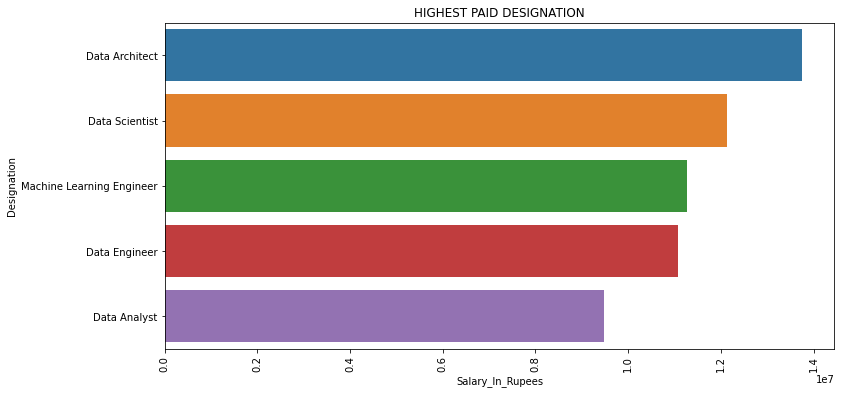

In [60]:
plt.figure(figsize=(12,6))
sns.barplot(x='Salary_In_Rupees',y='Designation',data=f1)
plt.xticks(rotation=90)
plt.title('HIGHEST PAID DESIGNATION')
plt.show()

## Q2: Highest employing country, designation and employee location

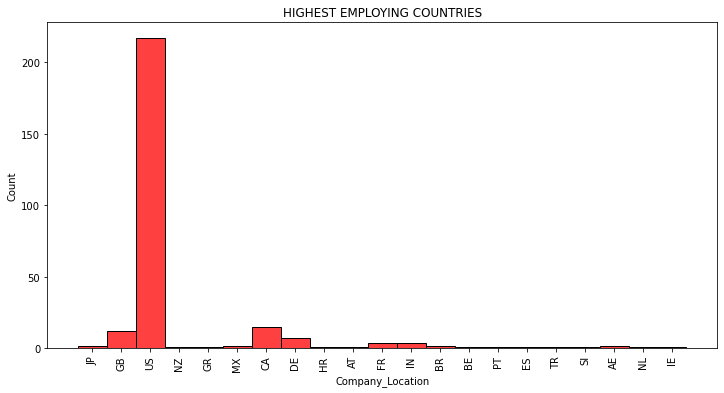

In [61]:
c=df1_s['Company_Location']
plt.figure(figsize=(12,6))
sns.histplot(data=c,color='red')
plt.xticks(rotation=90)
plt.title('HIGHEST EMPLOYING COUNTRIES')
plt.show()


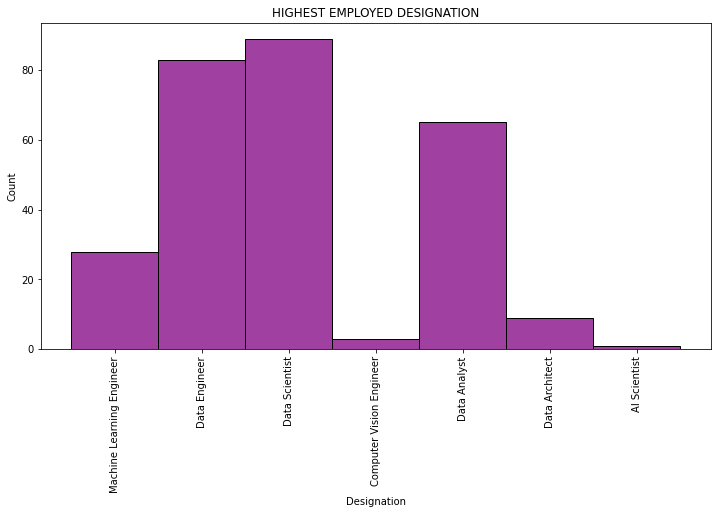

In [62]:
d=df1_s['Designation']
plt.figure(figsize=(12,6))
sns.histplot(data=d,color='purple')
plt.xticks(rotation=90)
plt.title('HIGHEST EMPLOYED DESIGNATION')
plt.show()

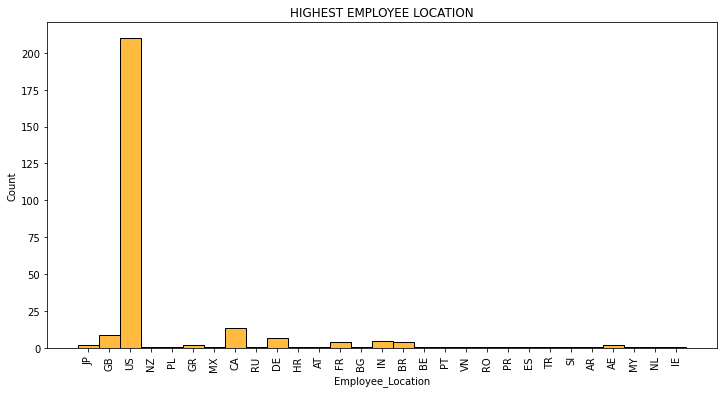

In [63]:
e=df1_s['Employee_Location']
plt.figure(figsize=(12,6))
sns.histplot(data=e,color='orange')
plt.xticks(rotation=90)
plt.title('HIGHEST EMPLOYEE LOCATION')
plt.show()

## Q3: What is the effect of remote work ratio on pay


In [64]:
f9=df1_s[['Remote_Working_Ratio','Salary_In_Rupees']].groupby(['Remote_Working_Ratio'],as_index= False).Salary_In_Rupees.mean()
f3_9_p=f9.sort_values('Salary_In_Rupees',ascending= False)
f3_9_p

,Remote_Working_Ratio,Salary_In_Rupees
2,Remote,1.145632e+07
1,On-site,1.123344e+07
0,Hybrid,7.579066e+06


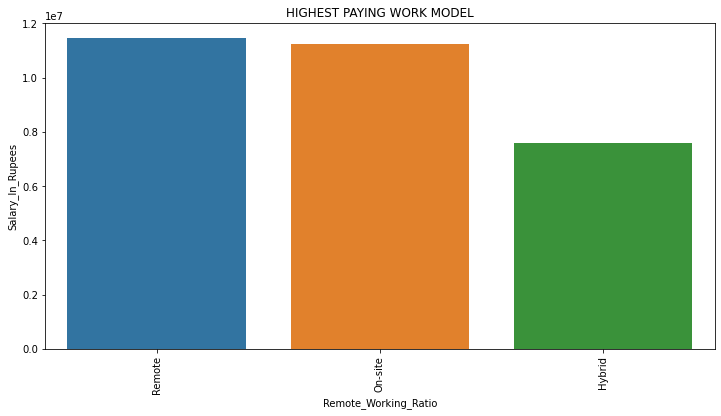

In [65]:
plt.figure(figsize=(12,6))
sns.barplot(y='Salary_In_Rupees',x='Remote_Working_Ratio', data=f3_9_p)
plt.xticks(rotation=90)
plt.title('HIGHEST PAYING WORK MODEL')
plt.show()

## Q4: What company size pays the most


In [66]:
f4_1=df1_s[['Company_Size','Salary_In_Rupees']].groupby(['Company_Size'],as_index= False).Salary_In_Rupees.mean()
f4_1_p=f4_1.sort_values('Salary_In_Rupees',ascending= False).head(10)
f4_1_p

,Company_Size,Salary_In_Rupees
0,Large,1.179095e+07
1,Medium,1.096592e+07
2,Small,9.232189e+06


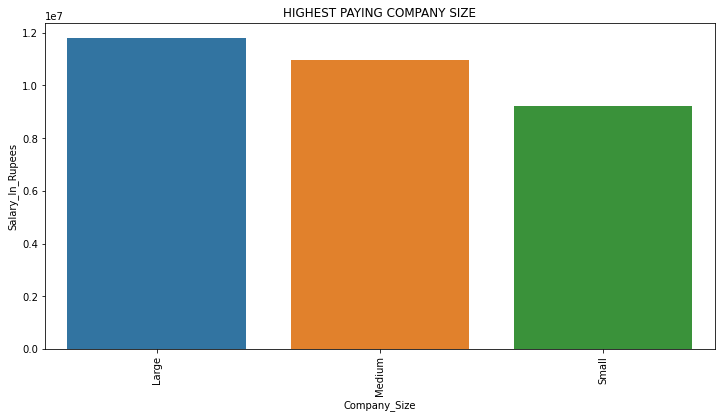

In [67]:
plt.figure(figsize=(12,6))
sns.barplot(y='Salary_In_Rupees',x='Company_Size', data=f4_1_p)
plt.xticks(rotation=90)
plt.title('HIGHEST PAYING COMPANY SIZE')
plt.show()

## Conclusion

* Machine Learning Engineer,Data Architect,Data Scientist,Data Analyst,Data Engineer are the top highest paid designations across the levels

* United states is the country with highest employement opportunities

* The remote working ratio affects the pay across different levels,although the diffrence isn't sharp, employees are better paid when they work remotely 

* Consistently across all levels, large size companies pays alot more than other two companies

* Those who live in US and In are informed about data jobs, while many other countries has no significant contribution to the emploment force.

* Even though designations like Machine Learning Engineer and Data Architect are highly paid, employement opportunities are very limited,hence there will be competition 

* Data Scientist role has a consistently high enployment ratio across the three levels.

## Recommendation

* The company should invest more of its in training Data analysts,Data Engineers and Data Scientist. This is because these designatons are not just relatively well paid, they also have high employement opportunities

* Knowing fully well that United States has data jobs more than any country across different designation, the company should recommend that its protege apply for job in the country

* Those who living in the united states are more aware of job opportunities in the data profession unlike other countries with very low awareness and skills, the company should make use of this opportunity to hunt new data talents from countries with low input into the labour force. Starting in this countries will require them to first educate on the available opportunities , this will further give them the chance to train many talents with litle or no competition

* The company can also seek partnership with large_size  companies for employment for their protege and encourage the proteges to look forward to those kinds of company

* Since working remotely earns workers most money, the company can adopt an online teaching model for its students, this will enable them to reach large audience faster across different countries and it will also help the students to develop ability to work effectively remotely too.